<a href="https://colab.research.google.com/github/giaminh8368/Samsung-Innovation-Campus/blob/main/Chapter%207/ex_0514.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Coding Exercise #0514

In [95]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets.reuters import load_data, get_word_index       # Reuters news data.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
warnings.filterwarnings('ignore')                  # Turn the warnings off.
%matplotlib inline

In [96]:
n_words = 1000                                        # Size of the vocabulary.
(X_train, y_train), (X_test, y_test) = load_data(num_words = n_words, test_split = 0.3)
n_train_size = X_train.shape[0]

In [97]:
n_cat = pd.Series(y_train).nunique()
n_cat

46

In [98]:
my_dict = get_word_index(path='reuters_word_index.json')

In [99]:
# Exchange the 'key' and 'value'.
my_dict_inv = {v:k for k,v in my_dict.items()}

In [100]:
# Translate each document.
i_news = 10                                        # Document number that can be changed at will.
news = list(pd.Series(X_train[i_news]).apply(lambda x: my_dict_inv[x]))
print(' '.join(news))

the federal gain only growth lt they meeting year reuter company did year an they of of reuter company of of 1987 had of of reuter had profits of pct dlrs


#### 1.3. Data preprocessing:

In [101]:
# Padding: newswire lengths are uniformly matched to maxlen.
# Cut away if longer than maxlen and fill with 0s if shorter than maxlen.
X_train = sequence.pad_sequences(X_train, maxlen = 100)
X_test = sequence.pad_sequences(X_test, maxlen = 100)

In [102]:
# Apply one-hot-encoding to the y variable.
y = np.concatenate([y_train,y_test],axis=0)
y = to_categorical(y,46)
y_train = y[:n_train_size,:]
y_test = y[n_train_size:,:]

#### 1.4. Define the model:

In [103]:
n_neurons = 100                   # Neurons within each memory cell.
n_input = 100                     # Dimension of the embeding space.

In [108]:
sequence_length = 100

my_model = Sequential()
my_model.add(Embedding(input_dim=n_words, output_dim=n_input, input_length=sequence_length))

my_model.add(LSTM(units=n_neurons, return_sequences=False, activation='tanh'))
my_model.add(Dense(n_cat, activation='softmax'))

my_model.build(input_shape=(None, sequence_length))
my_model.summary()


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_17 (Embedding)        │ (None, 100, 100)       │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 46)             │         4,646 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,046 (722.84 KB)

 Trainable params: 185,046 (722.84 KB)

 Non-trainable params: 0 (0.00 B)

#### 1.5. Define the optimizer and compile:

In [109]:
n_epochs = 20                      # Number of epochs.
batch_size = 20                    # Size of each batch.
learn_rate = 0.001                 # learning rate.

In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization, Bidirectional

sequence_length = 100
embedding_dim = n_input
vocab_size = n_words

my_model = Sequential()

my_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sequence_length))

my_model.add(Bidirectional(LSTM(units=n_neurons, return_sequences=True, activation='tanh')))
my_model.add(Dropout(0.3))
my_model.add(BatchNormalization())

my_model.add(LSTM(units=n_neurons // 2, return_sequences=False, activation='tanh'))
my_model.add(Dropout(0.3))

my_model.add(Dense(64, activation='relu'))
my_model.add(Dropout(0.2))
my_model.add(Dense(n_cat, activation='softmax'))
my_model.build(input_shape=(None, sequence_length))
my_model.summary()


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_18 (Embedding)        │ (None, 100, 100)       │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ (None, 100, 200)       │       160,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 100, 200)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 100, 200)       │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_25 (LSTM)                  │ (None, 50)             │        50,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │         3,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 318,054 (1.21 MB)

 Trainable params: 317,654 (1.21 MB)

 Non-trainable params: 400 (1.56 KB)

In [114]:
from tensorflow.keras.optimizers import Adam

learn_rate = 0.001
my_optimizer = Adam(learning_rate=learn_rate)

my_model.compile(
    optimizer=my_optimizer,
    loss='categorical_crossentropy',   # hoặc 'sparse_categorical_crossentropy' nếu y là số nguyên
    metrics=['accuracy']
)


In [115]:
my_summary = my_model.fit(X_train, y_train, epochs=n_epochs, batch_size = batch_size, validation_split=0.2, verbose = 1)

Epoch 1/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.4110 - loss: 2.4289 - val_accuracy: 0.5095 - val_loss: 1.8877
Epoch 2/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5191 - loss: 1.8636 - val_accuracy: 0.5178 - val_loss: 1.8889
Epoch 3/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.5350 - loss: 1.8331 - val_accuracy: 0.5032 - val_loss: 1.8185
Epoch 4/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5618 - loss: 1.7180 - val_accuracy: 0.5770 - val_loss: 1.6691
Epoch 5/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.5679 - loss: 1.6899 - val_accuracy: 0.5814 - val_loss: 1.6193
Epoch 6/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.5919 - loss: 1.6095 - val_accuracy: 0.6081 - val_loss: 1.5438
Epoch 7/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5931 - loss: 1.5973 - val_accuracy: 0.6272 - val_loss: 1.5064
Epoch 8/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.6121 - loss: 1.5230 - val_ac

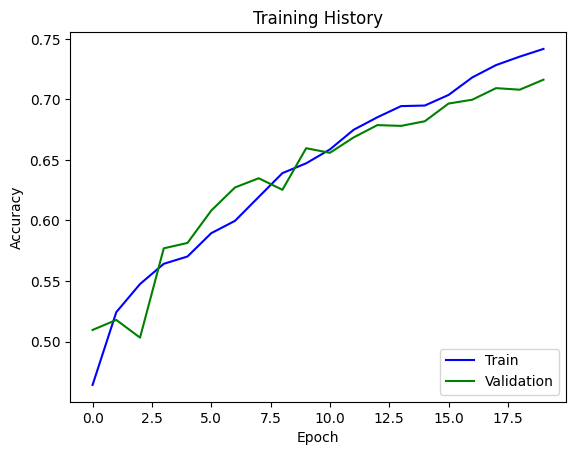

In [116]:
plt.plot(my_summary.history['accuracy'], c="b")
plt.plot(my_summary.history['val_accuracy'], c="g")
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [117]:
ACC = my_model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy : {}".format(np.round(ACC,3)))

Test Accuracy : 0.691
